In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import ipywidgets as widgets
from sklearn.neighbors import KernelDensity

# Multivariate View
To identify the correct/intuitive interpolation method of two random variables, we mostly looked at them in the spatial domain, see Pöthkow et al.. We now want to change the view into the value domain and identify the spatial position.

## Joint probability distribution function
We can compute the [probability mass function](https://en.wikipedia.org/wiki/Joint_probability_distribution) of two discrete random variables $X,Y$ using the following formular:
\begin{align*}
    p_{X,Y}(x,y) &= P(X = x \wedge Y = y) \\
    p_{X,Y}(x,y) &= P(X = x \wedge Y = y) \cdot P(X = x) \\
        &= P(X = x \wedge Y = y) \cdot P(Y = y).
\end{align*}
Or in the continuous case for the probability density function:
\begin{align*}
    f_{X,Y} (x,y) &= f_{Y \vert X} (y \vert x) f_X(x) \\
        &= f_{X \vert Y} (x \vert y) f_Y(y).
\end{align*}
In simple words, we need to multiply the conditional distribution with the corresponding probabilities of the other random variable.

To do the reversal, getting the [Conditional probability distribution](https://en.wikipedia.org/wiki/Conditional_probability_distribution), computing the PDF $f_X$ of a single random variable given the joint probability distribution $f_XY$ and the PDF $f_Y$:
\begin{align*}
    f_{X \vert Y}(x \vert y) &= \frac{ f_{XY}(x,y) }{ f_Y(y) }  \\
    f_{Y \vert X}(y \vert x) &= \frac{ f_{XY}(x,y) }{ f_X(x) }
\end{align*}

In [2]:
def normal_dist(x , mean , var):
    return 1 / np.sqrt(2*np.pi * var) * np.exp(-0.5*(x-mean)**2/var)

def f(y1, y2, m1, m2, sigma1, sigma2, rho):
    factor = 1 / (2 * np.pi * sigma1 * sigma2 * np.sqrt( 1 - rho**2 ))
    factor2 = -1 / ( 2 * (1 - rho**2) ) 
    polynom = ((y1 - m1)/sigma1)**2 - 2 * rho * (y1 - m1) * (y2 - m2) / sigma1 / sigma2 + ((y2 - m2)/sigma2)**2
    return factor * np.exp( factor2 * polynom )

In [3]:
mu1 = 3
var1 =  1
mu2 = 3.5
var2 = 0.5

v = np.linspace(0, 6, 100)
pdf1 = normal_dist(v, mu1, var1)
pdf2 = normal_dist(v, mu2, var2)

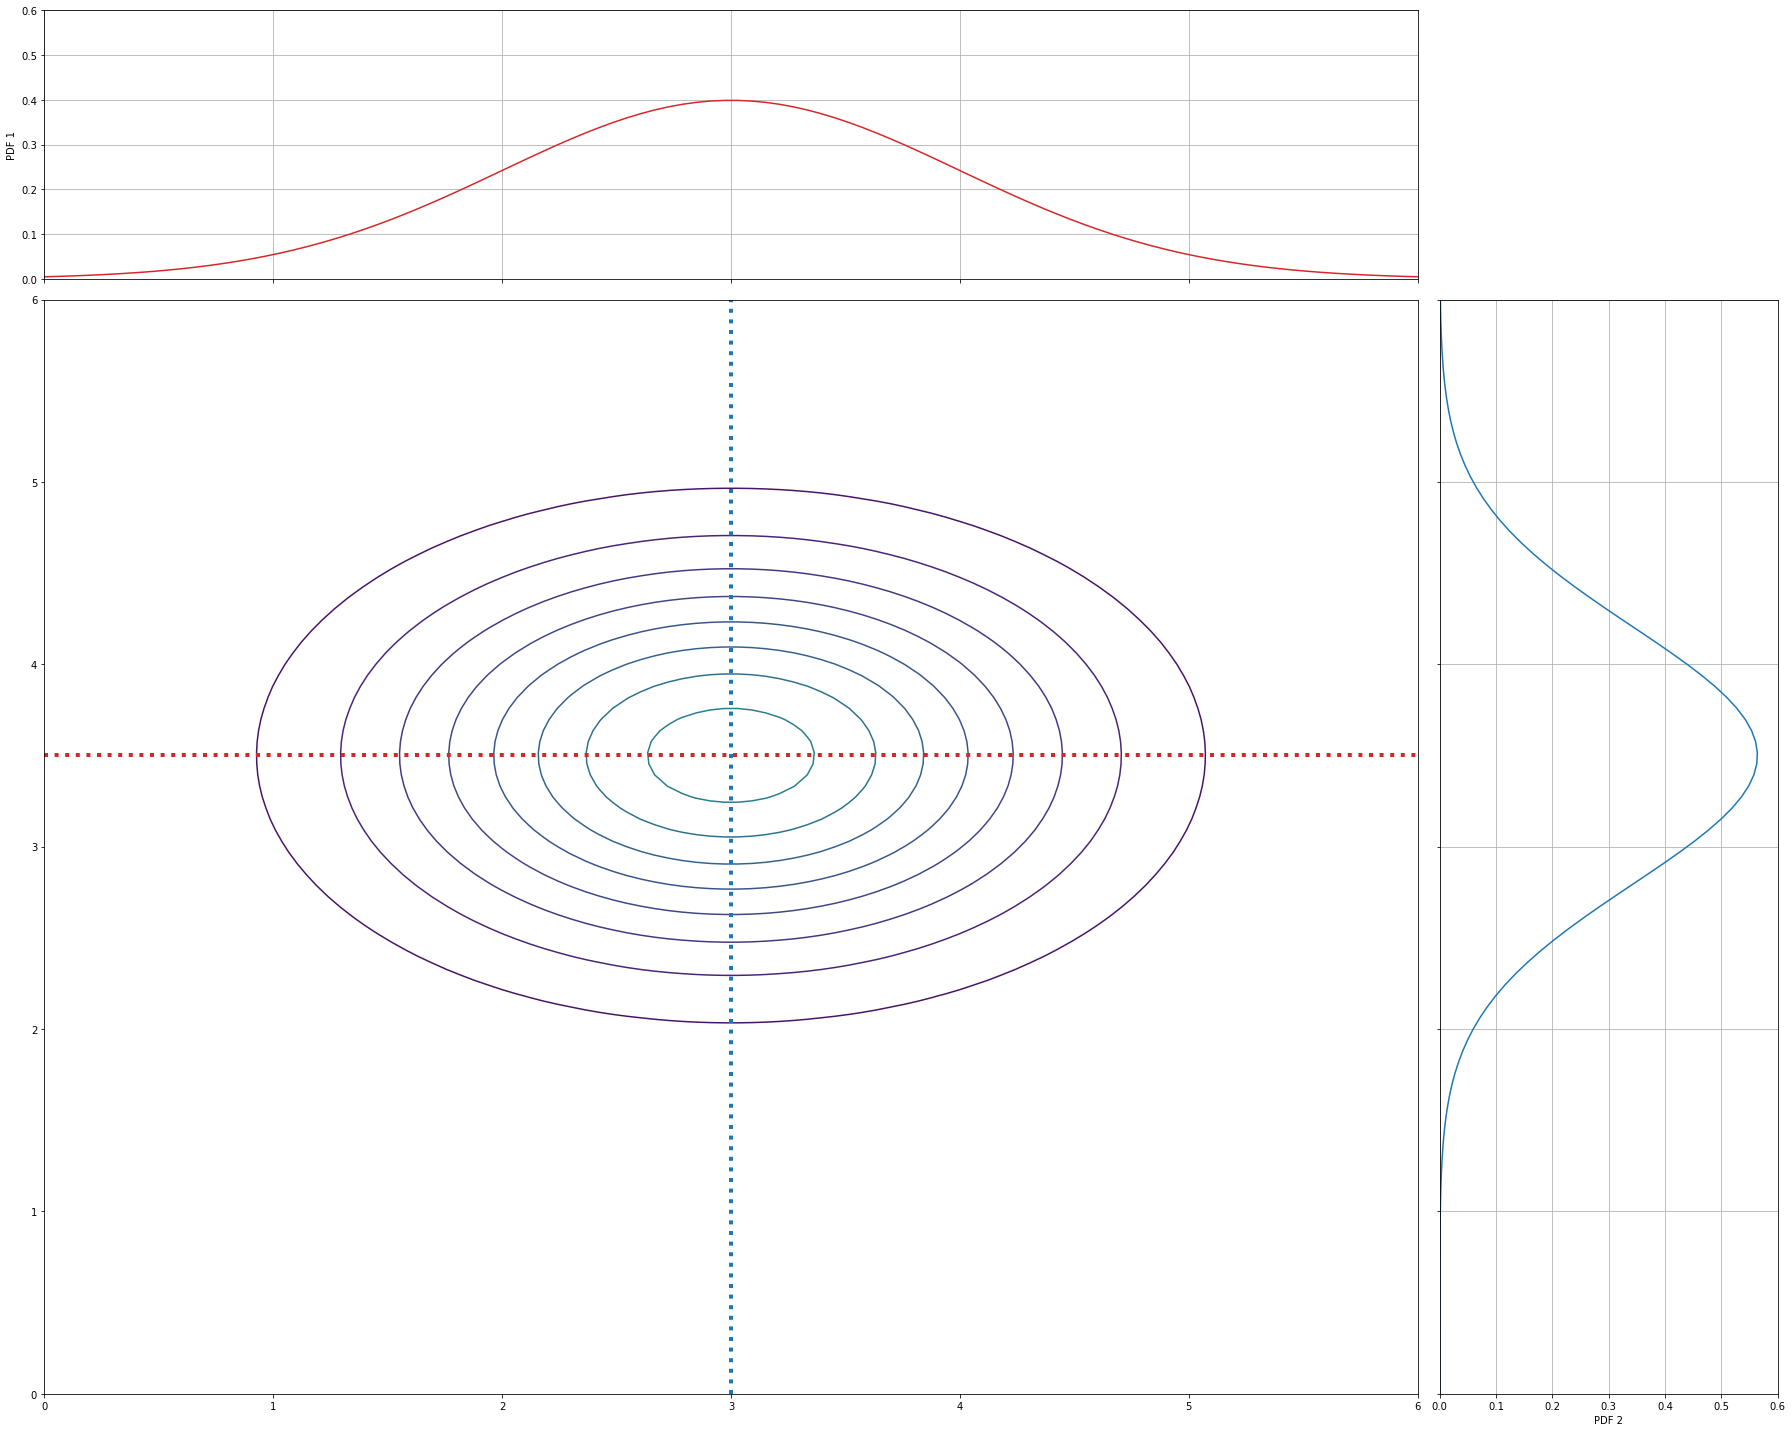

In [4]:
xx, yy = np.meshgrid(v, v)
multivariate_pdf = f(xx, yy, mu1, mu2, np.sqrt(var1), np.sqrt(var2), 0)

levels = np.linspace(0, 0.5, 20)

#########
# Image #
#########
fig = plt.figure(figsize=(25,20))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.5], height_ratios=[0.5, 1, 1])

ax1 = fig.add_subplot(gs[0,:2])
ax1.plot(v, multivariate_pdf.reshape(100,100)[50,:] / pdf2[50], c='tab:red')
ax1.set_xticklabels([])
ax1.set_ylabel('PDF 1')
ax1.grid()
ax1.set_xlim(0,6)
ax1.set_ylim(0,0.6)

ax2 = fig.add_subplot(gs[1:,2])
ax2.plot(multivariate_pdf.reshape(100,100)[:,50] / pdf1[50], v, c='tab:blue')
ax2.set_yticklabels([])
ax2.set_xlabel('PDF 2')
ax2.grid()
ax2.set_ylim(0,6)
ax2.set_xlim(0,0.6)

ax3 = fig.add_subplot(gs[1:,:2])
ax3.contour(xx, yy, multivariate_pdf, levels=levels, cmap='viridis')
ax3.axvline(3, 0, 1, ls='dotted', c='tab:blue', lw=4)
ax3.axhline(3.5, 0, 1, ls='dotted', c='tab:red', lw=4)
#ax3.grid()

plt.tight_layout()

plt.show()


# Moments

/tmp/ipykernel_2815270/2012371899.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


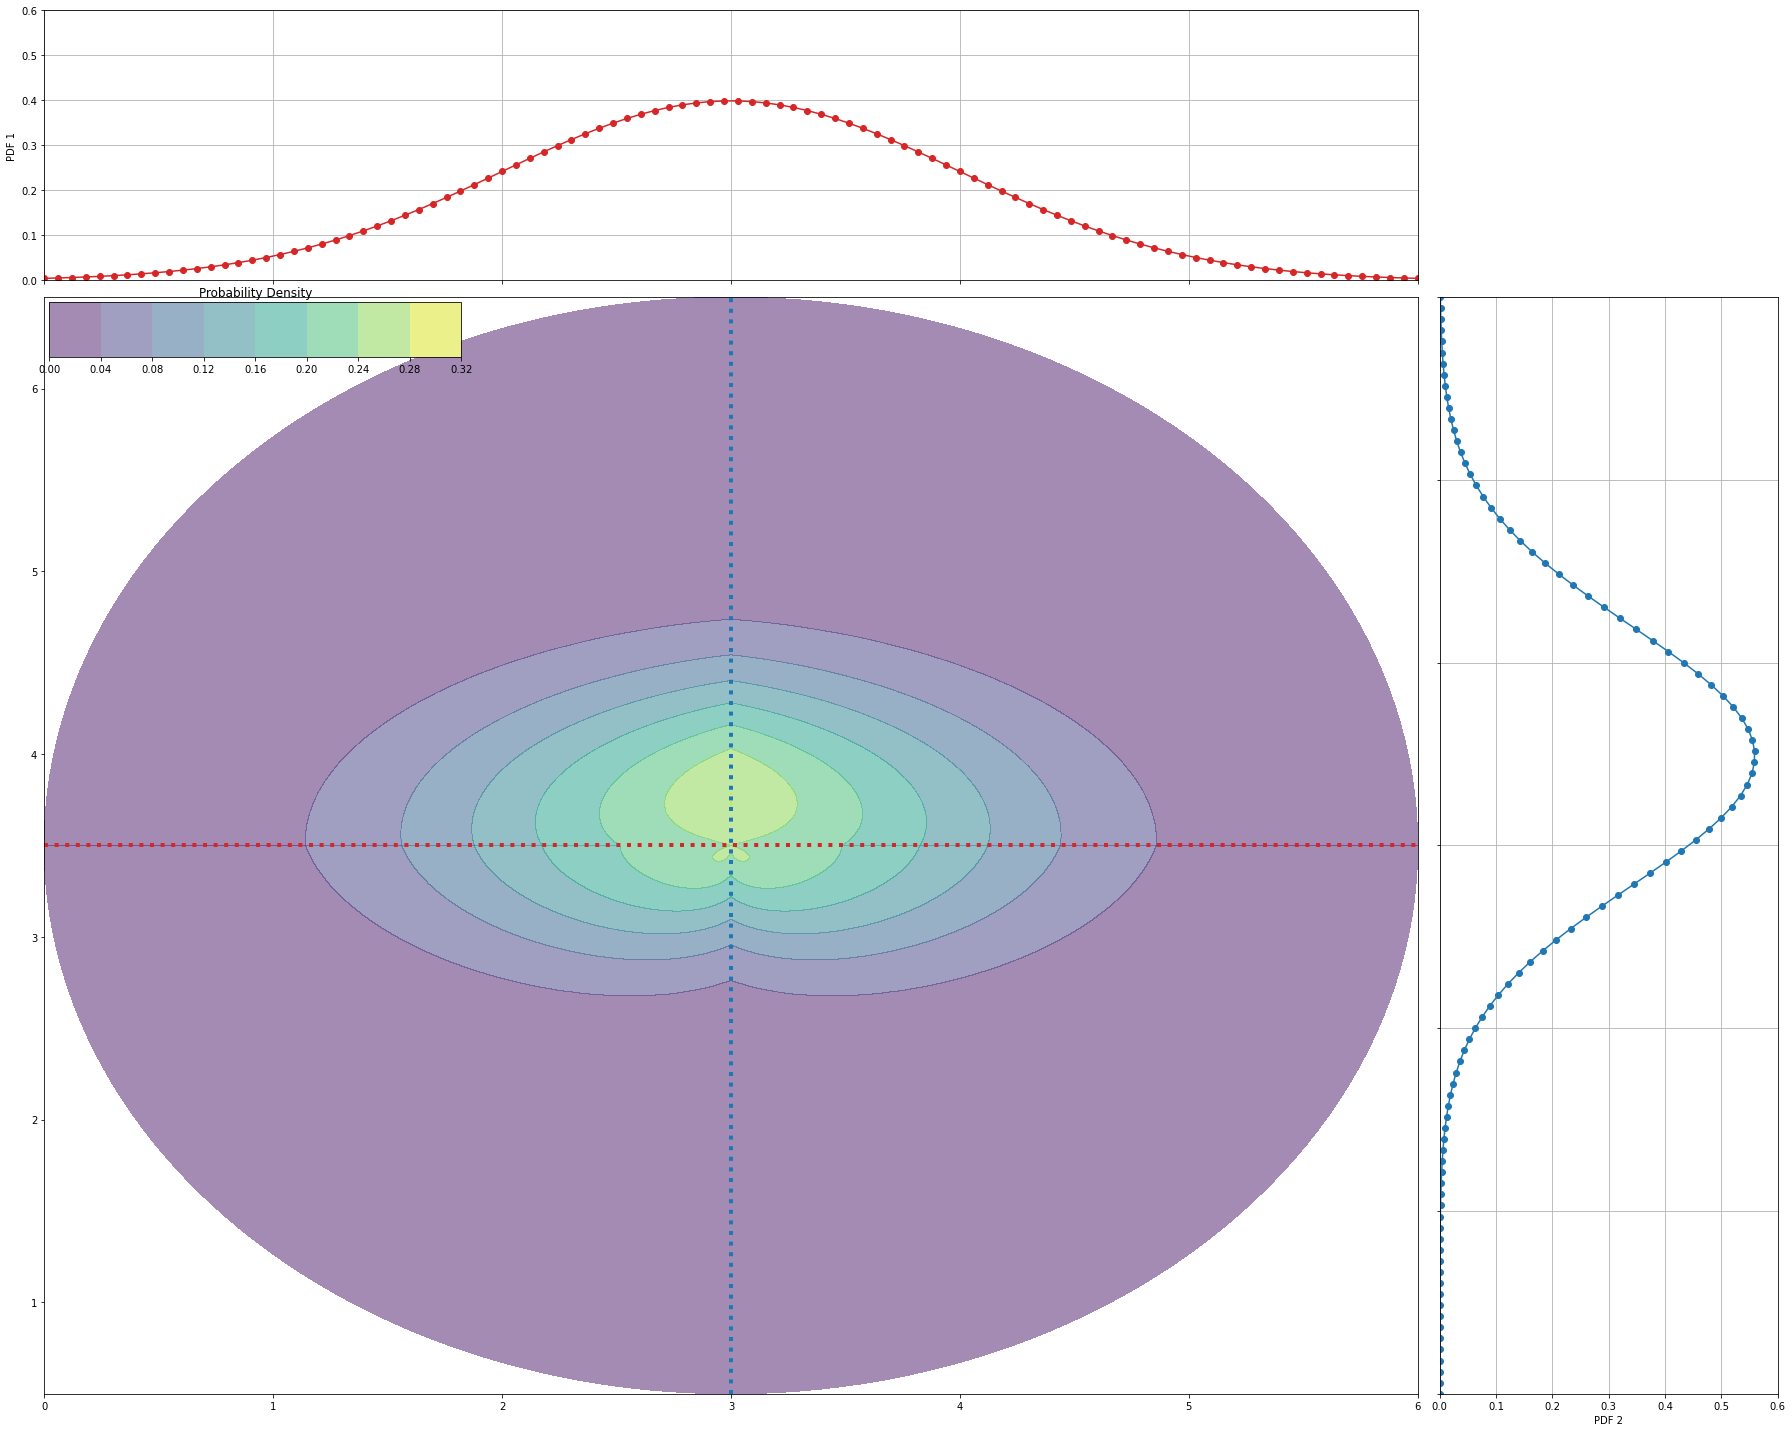

In [5]:
R = lambda alpha: np.array([
    [np.cos(alpha), np.sin(alpha)],
    [-np.sin(alpha), np.cos(alpha)]
])

pos = np.zeros((99, 100, 2))
for idx,alpha in enumerate(np.linspace(0, np.pi, 99)):
    points = np.array([v, np.ones_like(v)*mu2]).T
    points = points - np.array([mu1, mu2])
    points = points @ R(alpha)
    points = points + np.array([mu1, mu2])
    pos[idx,:] = points

space = np.hstack([
    np.linspace(0, 1, 50),
    np.linspace(1, 0, 50)[1:]
])
mus = np.array([ mu2 * s + mu1 * (1-s) for s in space])
vars = np.array([ np.sqrt(var2) * s + np.sqrt(var1) * (1-s) for s in space])**2

moments_pdf = np.array([normal_dist(v, m, va) * normal_dist(p[:,1], mu2, var2) for m, va, p in zip(mus, vars, pos)])

levels = np.linspace(0, 0.5, 20)

#########
# Image #
#########
fig = plt.figure(figsize=(25,20))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.5], height_ratios=[0.5, 1, 1])

ax1 = fig.add_subplot(gs[0,:2])
ax1.plot(v, moments_pdf[0,:] / normal_dist(mu2, mu2, var2), c='tab:red', marker='o')
ax1.set_xticklabels([])
ax1.set_ylabel('PDF 1')
ax1.grid()
ax1.set_xlim(0,6)
ax1.set_ylim(0,0.6)

ax2 = fig.add_subplot(gs[1:,2])
ax2.plot(moments_pdf[50,:] / normal_dist(pos[50,:,1], mu2, var2), v, c='tab:blue', marker='o')
ax2.set_yticklabels([])
ax2.set_xlabel('PDF 2')
ax2.grid()
ax2.set_ylim(0,6)
ax2.set_xlim(0,0.6)

ax3 = fig.add_subplot(gs[1:,:2])
img3 = ax3.contourf(pos[:,:,0], pos[:,:,1], moments_pdf, cmap='viridis', alpha=0.5)
ax3.axvline(3, 0, 1, ls='dotted', c='tab:blue', lw=4)
ax3.axhline(3.5, 0, 1, ls='dotted', c='tab:red', lw=4)

cbaxes = inset_axes(ax3, width="30%", height="5%", loc=2)
cbar = plt.colorbar(img3, cax=cbaxes, orientation='horizontal')
cbar.ax.set_title('Probability Density')

plt.tight_layout()

plt.show()

In [6]:
@widgets.interact(idx=(0,moments_pdf.shape[0]//2,1))
def show_pdf(idx=0):

    marginal_distribution = np.array([pdf_XY / normal_dist(p[:,1], mu2, var2) for pdf_XY,p in zip(moments_pdf[:50,:], pos)])

    x = np.linspace(0,1, 99)

    mu_rolling_t1 = np.linspace(mu1, mu2, 99)
    sigma_rolling_t1 = np.linspace(np.sqrt(var1), np.sqrt(var2), 99)

    fig = plt.figure(figsize=(25,20))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1,2])

    ax1 = fig.add_subplot(gs[0,0])
    ax1.set_title(r'$s = {:.02f}$'.format(idx / 50))
    ax1.plot(v, pdf1, c='tab:red', ls='dashed')
    ax1.plot(v, pdf2, c='tab:blue', ls='dashed')
    ax1.plot(v, marginal_distribution[idx,:], c='k', lw=2)
    ax1.set_xlabel(r'$v$')
    ax1.set_ylabel(r'$f$')
    ax1.set_xlim(0,6)
    ax1.set_ylim(0,0.6)
    ax1.grid()

    ax2 = fig.add_subplot(gs[0,1])
    ax2.set_title(r'$\phi = {:.02f}^\circ$'.format( idx * np.pi/2 / 50 * 180 / np.pi ))
    ax2.contour(pos[:,:,0], pos[:,:,1], moments_pdf, levels=levels, cmap='viridis')
    ax2.plot(pos[idx, :, 0], pos[idx, :, 1], c='k', ls='dashed')
    ax2.axvline(mu1, 0, 1, c='tab:red', ls='dashed')
    ax2.axhline(mu2, 0, 1, c='tab:blue', ls='dashed')
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylabel(r'$x_2$')

    ax3 = fig.add_subplot(gs[1,:])
    ax3.axis('off')

    # t-axis
    ax3.annotate(r'', xy=[0, 1.1], xycoords='axes fraction', xytext=[0, -0.03], arrowprops=dict(fc='black', ec='black', arrowstyle='->', lw=1))
    ax3.text(0, 1.1, '$t$', transform=ax3.transAxes)
    ax3.annotate(r'', xy=[1, 1.1], xycoords='axes fraction', xytext=[1, -0.03], arrowprops=dict(fc='black', ec='black', arrowstyle='->', lw=1))
    ax3.text(1.0, 1.1, '$t$', transform=ax3.transAxes)
    ax3.annotate(r'', xy=[1.05, 0], xycoords='axes fraction', xytext=[-0.03, 0], arrowprops=dict(fc='black', ec='black', arrowstyle='->', lw=1))
    ax3.text(-0.04, -0.01, '$0$', transform=ax3.transAxes)
    ax3.text(1.05, 0, '$x$', transform=ax3.transAxes)

    img = ax3.imshow(marginal_distribution.T, extent=[0, 1, 0, 6], aspect='auto', origin='lower', interpolation='bilinear', cmap='Blues')
    ax3.plot(x, mu_rolling_t1, c='k')
    ax3.plot(x, mu_rolling_t1 + sigma_rolling_t1, c='k', ls='dashed')
    ax3.plot(x, mu_rolling_t1 - sigma_rolling_t1, c='k', ls='dashed')
    ax3.axvline(idx / 49, 0, 1, ls='dashed', c='k', lw=2)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,6)

    # colorbar
    cbaxes = inset_axes(ax3, width="30%", height="5%", loc=9)
    cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
    cbar.set_ticks([0, marginal_distribution.max()])
    cbar.set_ticklabels(['Low', 'Hight'])
    cbar.ax.set_title('Probability Density')

    # x-ticks
    ax3.text(-0.00, -0.05, '$x_1$', transform=ax3.transAxes)
    ax3.text(1, -0.05, '$x_2$', transform=ax3.transAxes)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,6)

    plt.show()


interactive(children=(IntSlider(value=0, description='idx', max=49), Output()), _dom_classes=('widget-interact…

# Sample interpoltion

/tmp/ipykernel_2815270/3014039189.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


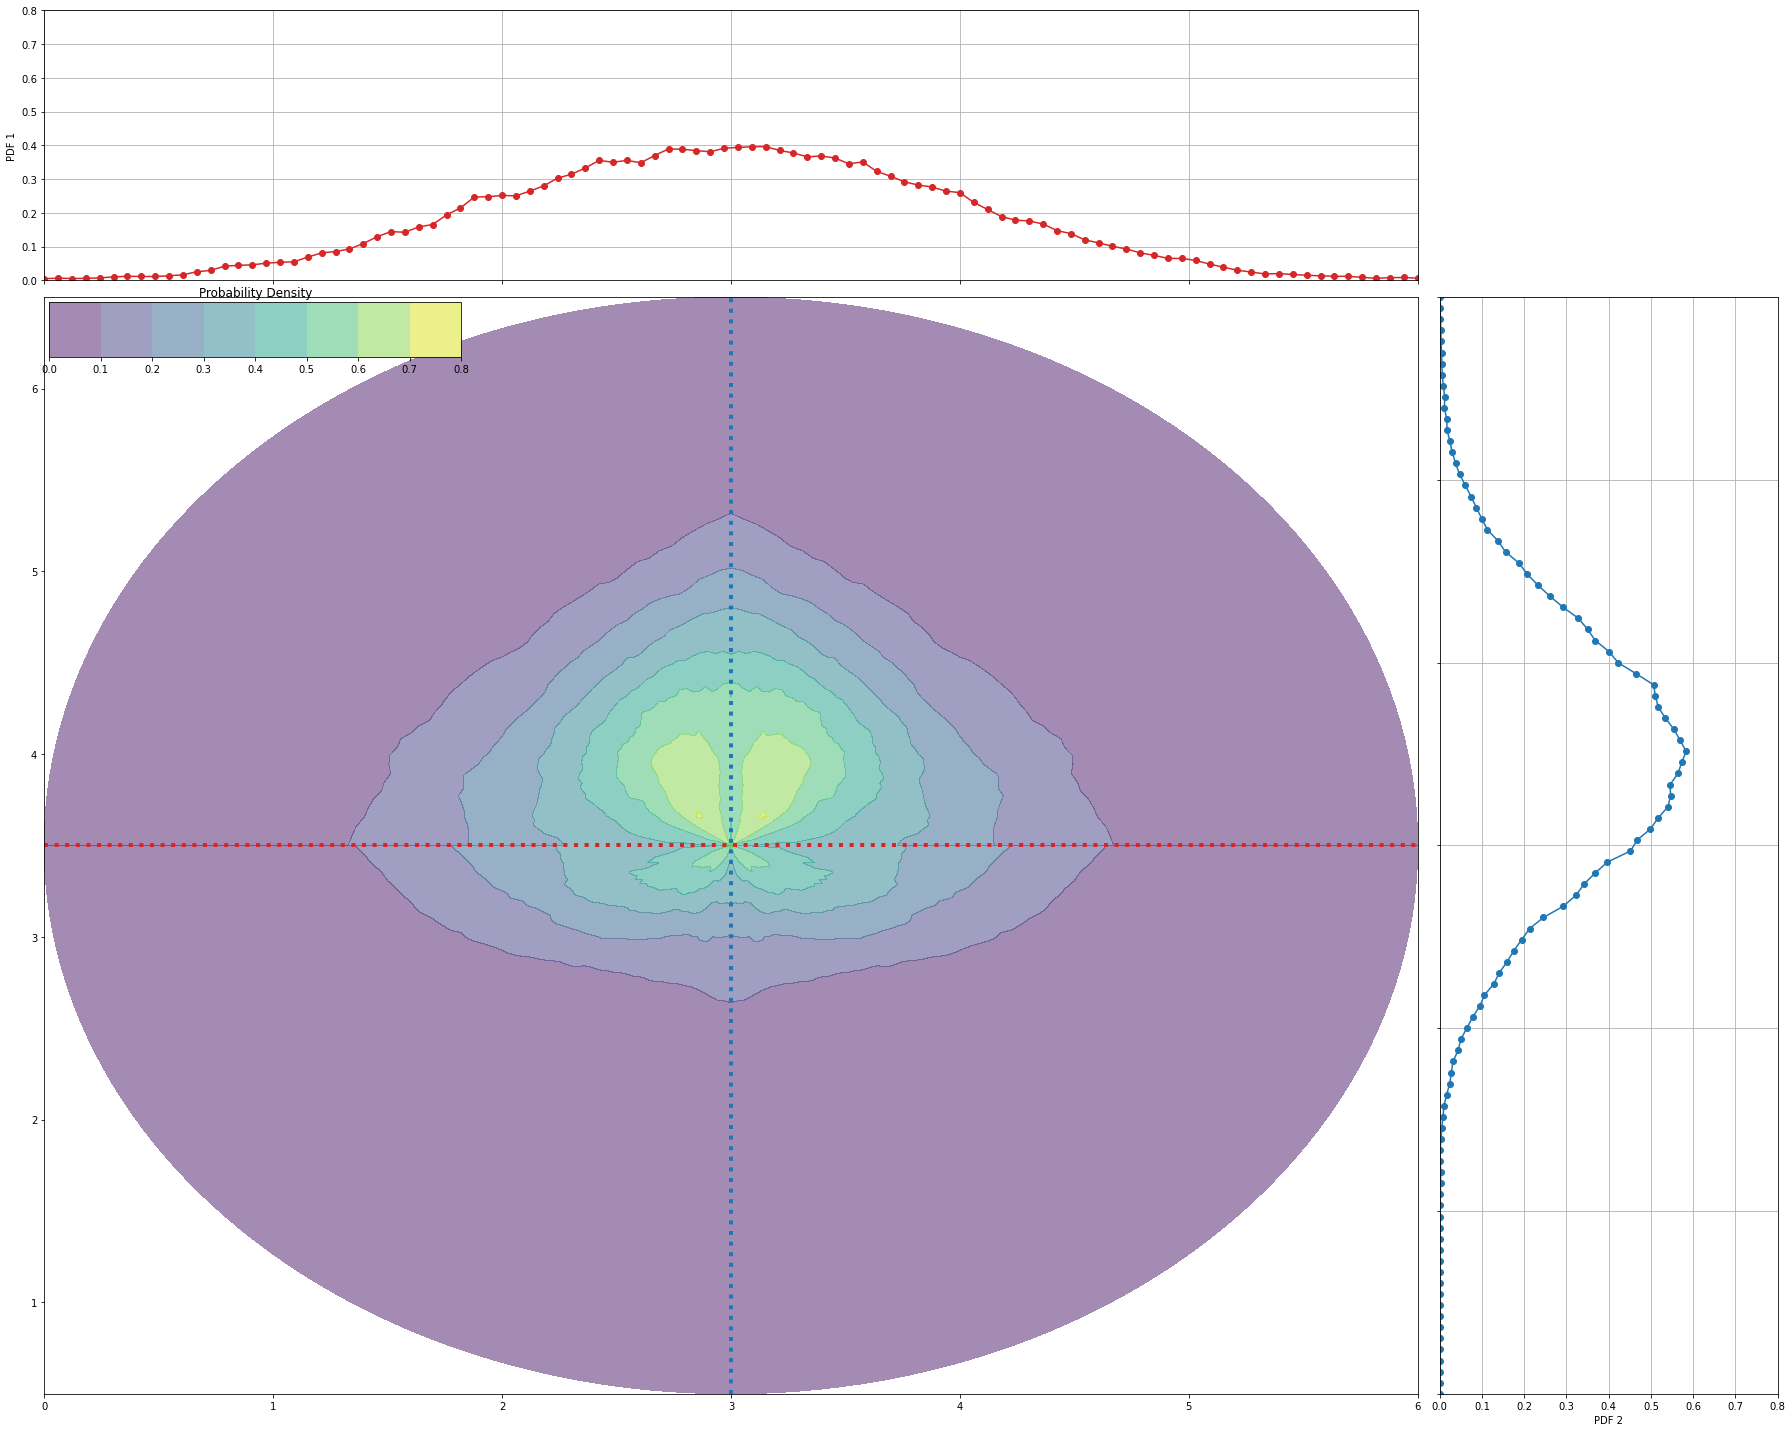

In [9]:
R = lambda alpha: np.array([
    [np.cos(alpha), np.sin(alpha)],
    [-np.sin(alpha), np.cos(alpha)]
])

pos = np.zeros((99, 100, 2))
for idx,alpha in enumerate(np.linspace(0, np.pi, 99)):
    points = np.array([v, np.ones_like(v)*mu2]).T
    points = points - np.array([mu1, mu2])
    points = points @ R(alpha)
    points = points + np.array([mu1, mu2])
    pos[idx,:] = points

rng = np.random.default_rng()
x1 = rng.normal(mu1, np.sqrt(var1), 10000)
x2 = rng.normal(mu2, np.sqrt(var2), 10000)

T_s = 99
space = np.hstack([
    np.linspace(0, 1, 50),
    np.linspace(1, 0, 50)[1:]
])
x = np.array([a * x2 + (1-a) * x1 for a in space])

T_v = 100
sample_pdf = np.empty((T_s, T_v))
KDEs = []
kde_last = KernelDensity(kernel='tophat', bandwidth=0.1).fit(x[49,:].reshape((-1,1)))
for s in range(T_s):
    kde = KernelDensity(kernel='tophat', bandwidth=0.1).fit(x[s,:].reshape((-1,1)))
    KDEs.append(kde)
    sample_pdf[s,:] = np.exp(kde.score_samples(v.reshape((-1,1))))

levels = np.linspace(0, 0.5, 20)

#########
# Image #
#########
fig = plt.figure(figsize=(25,20))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.5], height_ratios=[0.5, 1, 1])

ax1 = fig.add_subplot(gs[0,:2])
ax1.plot(v, np.exp(KDEs[0].score_samples(v.reshape((-1,1)))), c='tab:red', marker='o')
ax1.set_xticklabels([])
ax1.set_ylabel('PDF 1')
ax1.grid()
ax1.set_xlim(0,6)
ax1.set_ylim(0,0.8)

ax2 = fig.add_subplot(gs[1:,2])
ax2.plot(np.exp(KDEs[50].score_samples(v.reshape((-1,1)))), v, c='tab:blue', marker='o')
ax2.set_yticklabels([])
ax2.set_xlabel('PDF 2')
ax2.grid()
ax2.set_ylim(0,6)
ax2.set_xlim(0,0.8)

ax3 = fig.add_subplot(gs[1:,:2])
img3 = ax3.contourf(pos[:,:,0], pos[:,:,1], sample_pdf, cmap='viridis', alpha=0.5)
ax3.axvline(3, 0, 1, ls='dotted', c='tab:blue', lw=4)
ax3.axhline(3.5, 0, 1, ls='dotted', c='tab:red', lw=4)

cbaxes = inset_axes(ax3, width="30%", height="5%", loc=2)
cbar = plt.colorbar(img3, cax=cbaxes, orientation='horizontal')
cbar.ax.set_title('Probability Density')

plt.tight_layout()

plt.show()

In [8]:
@widgets.interact(idx=(0,sample_pdf.shape[0]//2,1))
def show_pdf(idx=0):

    marginal_distribution = sample_pdf[:50,:]

    x = np.linspace(0, 1, 50)

    fig = plt.figure(figsize=(25,20))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1,2])

    ax1 = fig.add_subplot(gs[0,0])
    ax1.set_title(r'$s = {:.02f}$'.format(idx / 50))
    ax1.plot(v, pdf1, c='tab:red', ls='dashed')
    ax1.plot(v, pdf2, c='tab:blue', ls='dashed')
    ax1.plot(v, marginal_distribution[idx,:], c='k', lw=2)
    ax1.set_xlabel(r'$v$')
    ax1.set_ylabel(r'$f$')
    ax1.set_xlim(0,6)
    ax1.set_ylim(0,1)
    ax1.grid()

    ax2 = fig.add_subplot(gs[0,1])
    ax2.set_title(r'$\phi = {:.02f}^\circ$'.format( idx * np.pi/2 / 50 * 180 / np.pi ))
    ax2.contour(pos[:,:,0], pos[:,:,1], sample_pdf, cmap='viridis')
    ax2.plot(pos[idx, :, 0], pos[idx, :, 1], c='k', ls='dashed')
    ax2.axvline(mu1, 0, 1, c='tab:red', ls='dashed')
    ax2.axhline(mu2, 0, 1, c='tab:blue', ls='dashed')
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylabel(r'$x_2$')

    ax3 = fig.add_subplot(gs[1,:])
    ax3.axis('off')

    # t-axis
    ax3.annotate(r'', xy=[0, 1.1], xycoords='axes fraction', xytext=[0, -0.03], arrowprops=dict(fc='black', ec='black', arrowstyle='->', lw=1))
    ax3.text(0, 1.1, '$t$', transform=ax3.transAxes)
    ax3.annotate(r'', xy=[1, 1.1], xycoords='axes fraction', xytext=[1, -0.03], arrowprops=dict(fc='black', ec='black', arrowstyle='->', lw=1))
    ax3.text(1.0, 1.1, '$t$', transform=ax3.transAxes)
    ax3.annotate(r'', xy=[1.05, 0], xycoords='axes fraction', xytext=[-0.03, 0], arrowprops=dict(fc='black', ec='black', arrowstyle='->', lw=1))
    ax3.text(-0.04, -0.01, '$0$', transform=ax3.transAxes)
    ax3.text(1.05, 0, '$x$', transform=ax3.transAxes)

    img = ax3.imshow(marginal_distribution.T, extent=[0, 1, 0, 6], aspect='auto', origin='lower', interpolation='bilinear', cmap='Blues')
    #ax3.plot(x, mu_rolling_t1, c='k')
    #ax3.plot(x, mu_rolling_t1 + sigma_rolling_t1, c='k', ls='dashed')
    #ax3.plot(x, mu_rolling_t1 - sigma_rolling_t1, c='k', ls='dashed')
    ax3.axvline(idx / 49, 0, 1, ls='dashed', c='k', lw=2)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,0.6)

    # colorbar
    cbaxes = inset_axes(ax3, width="30%", height="5%", loc=9)
    cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
    cbar.set_ticks([0, marginal_distribution.max()])
    cbar.set_ticklabels(['Low', 'Hight'])
    cbar.ax.set_title('Probability Density')

    # x-ticks
    ax3.text(-0.00, -0.05, '$x_1$', transform=ax3.transAxes)
    ax3.text(1, -0.05, '$x_2$', transform=ax3.transAxes)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,6)

    plt.show()


interactive(children=(IntSlider(value=0, description='idx', max=49), Output()), _dom_classes=('widget-interact…